In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import numpy as np

#remove the warnings 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


# Exploratory data analysis  
**Lets explore the column on data that to check the fare**

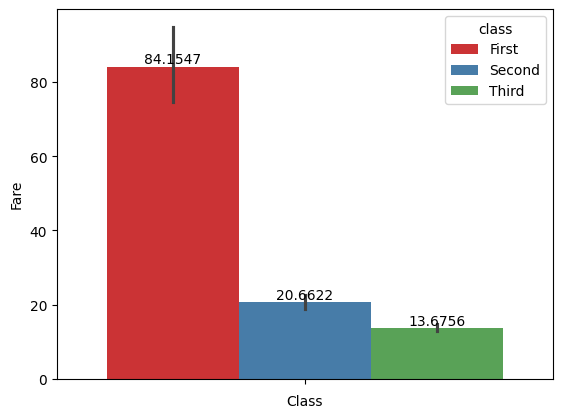

In [4]:

ax=sns.barplot(data=df,hue="class",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Class")
    plt.ylabel("Fare")
plt.show()

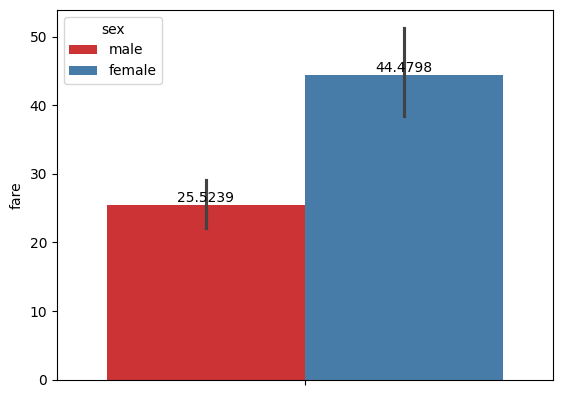

In [5]:

ax=sns.barplot(data=df,hue="sex",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [6]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

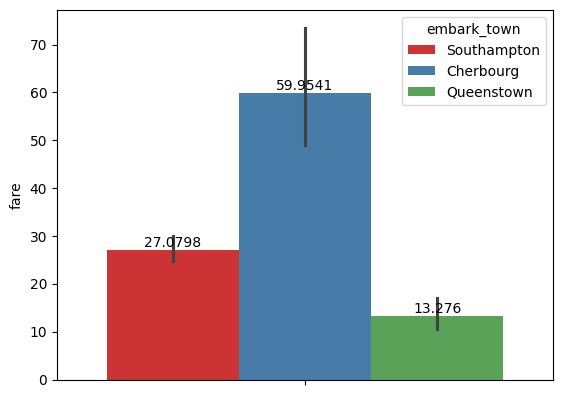

In [8]:
ax=sns.barplot(data=df,hue="embark_town",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

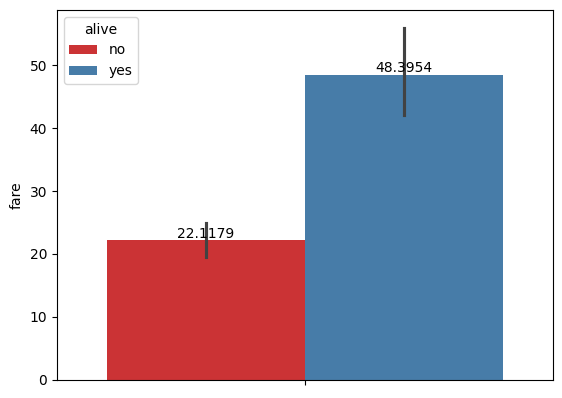

In [9]:
ax=sns.barplot(data=df,hue="alive",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

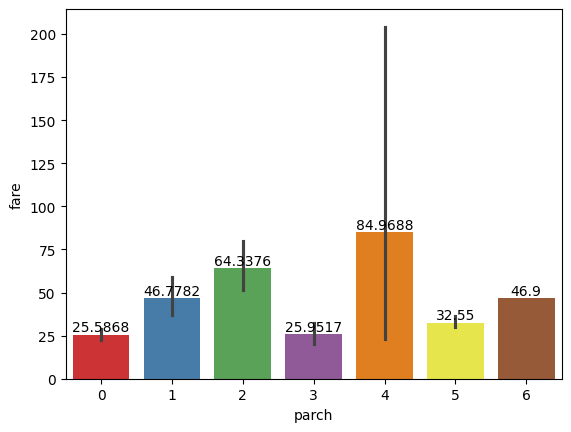

In [10]:
ax=sns.barplot(data=df,x="parch",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

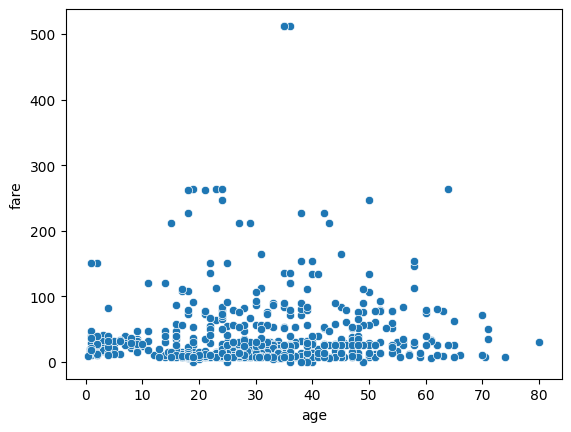

In [11]:
ax=sns.scatterplot(data=df,x="age",y="fare")
for i in ax.containers:
    ax.bar_label(i)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

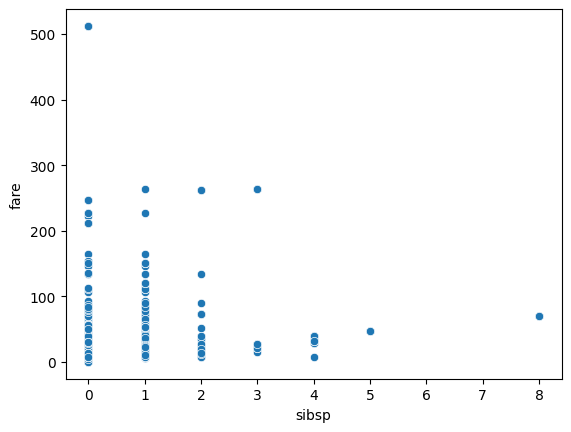

In [12]:
ax=sns.scatterplot(data=df,x="sibsp",y="fare",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show

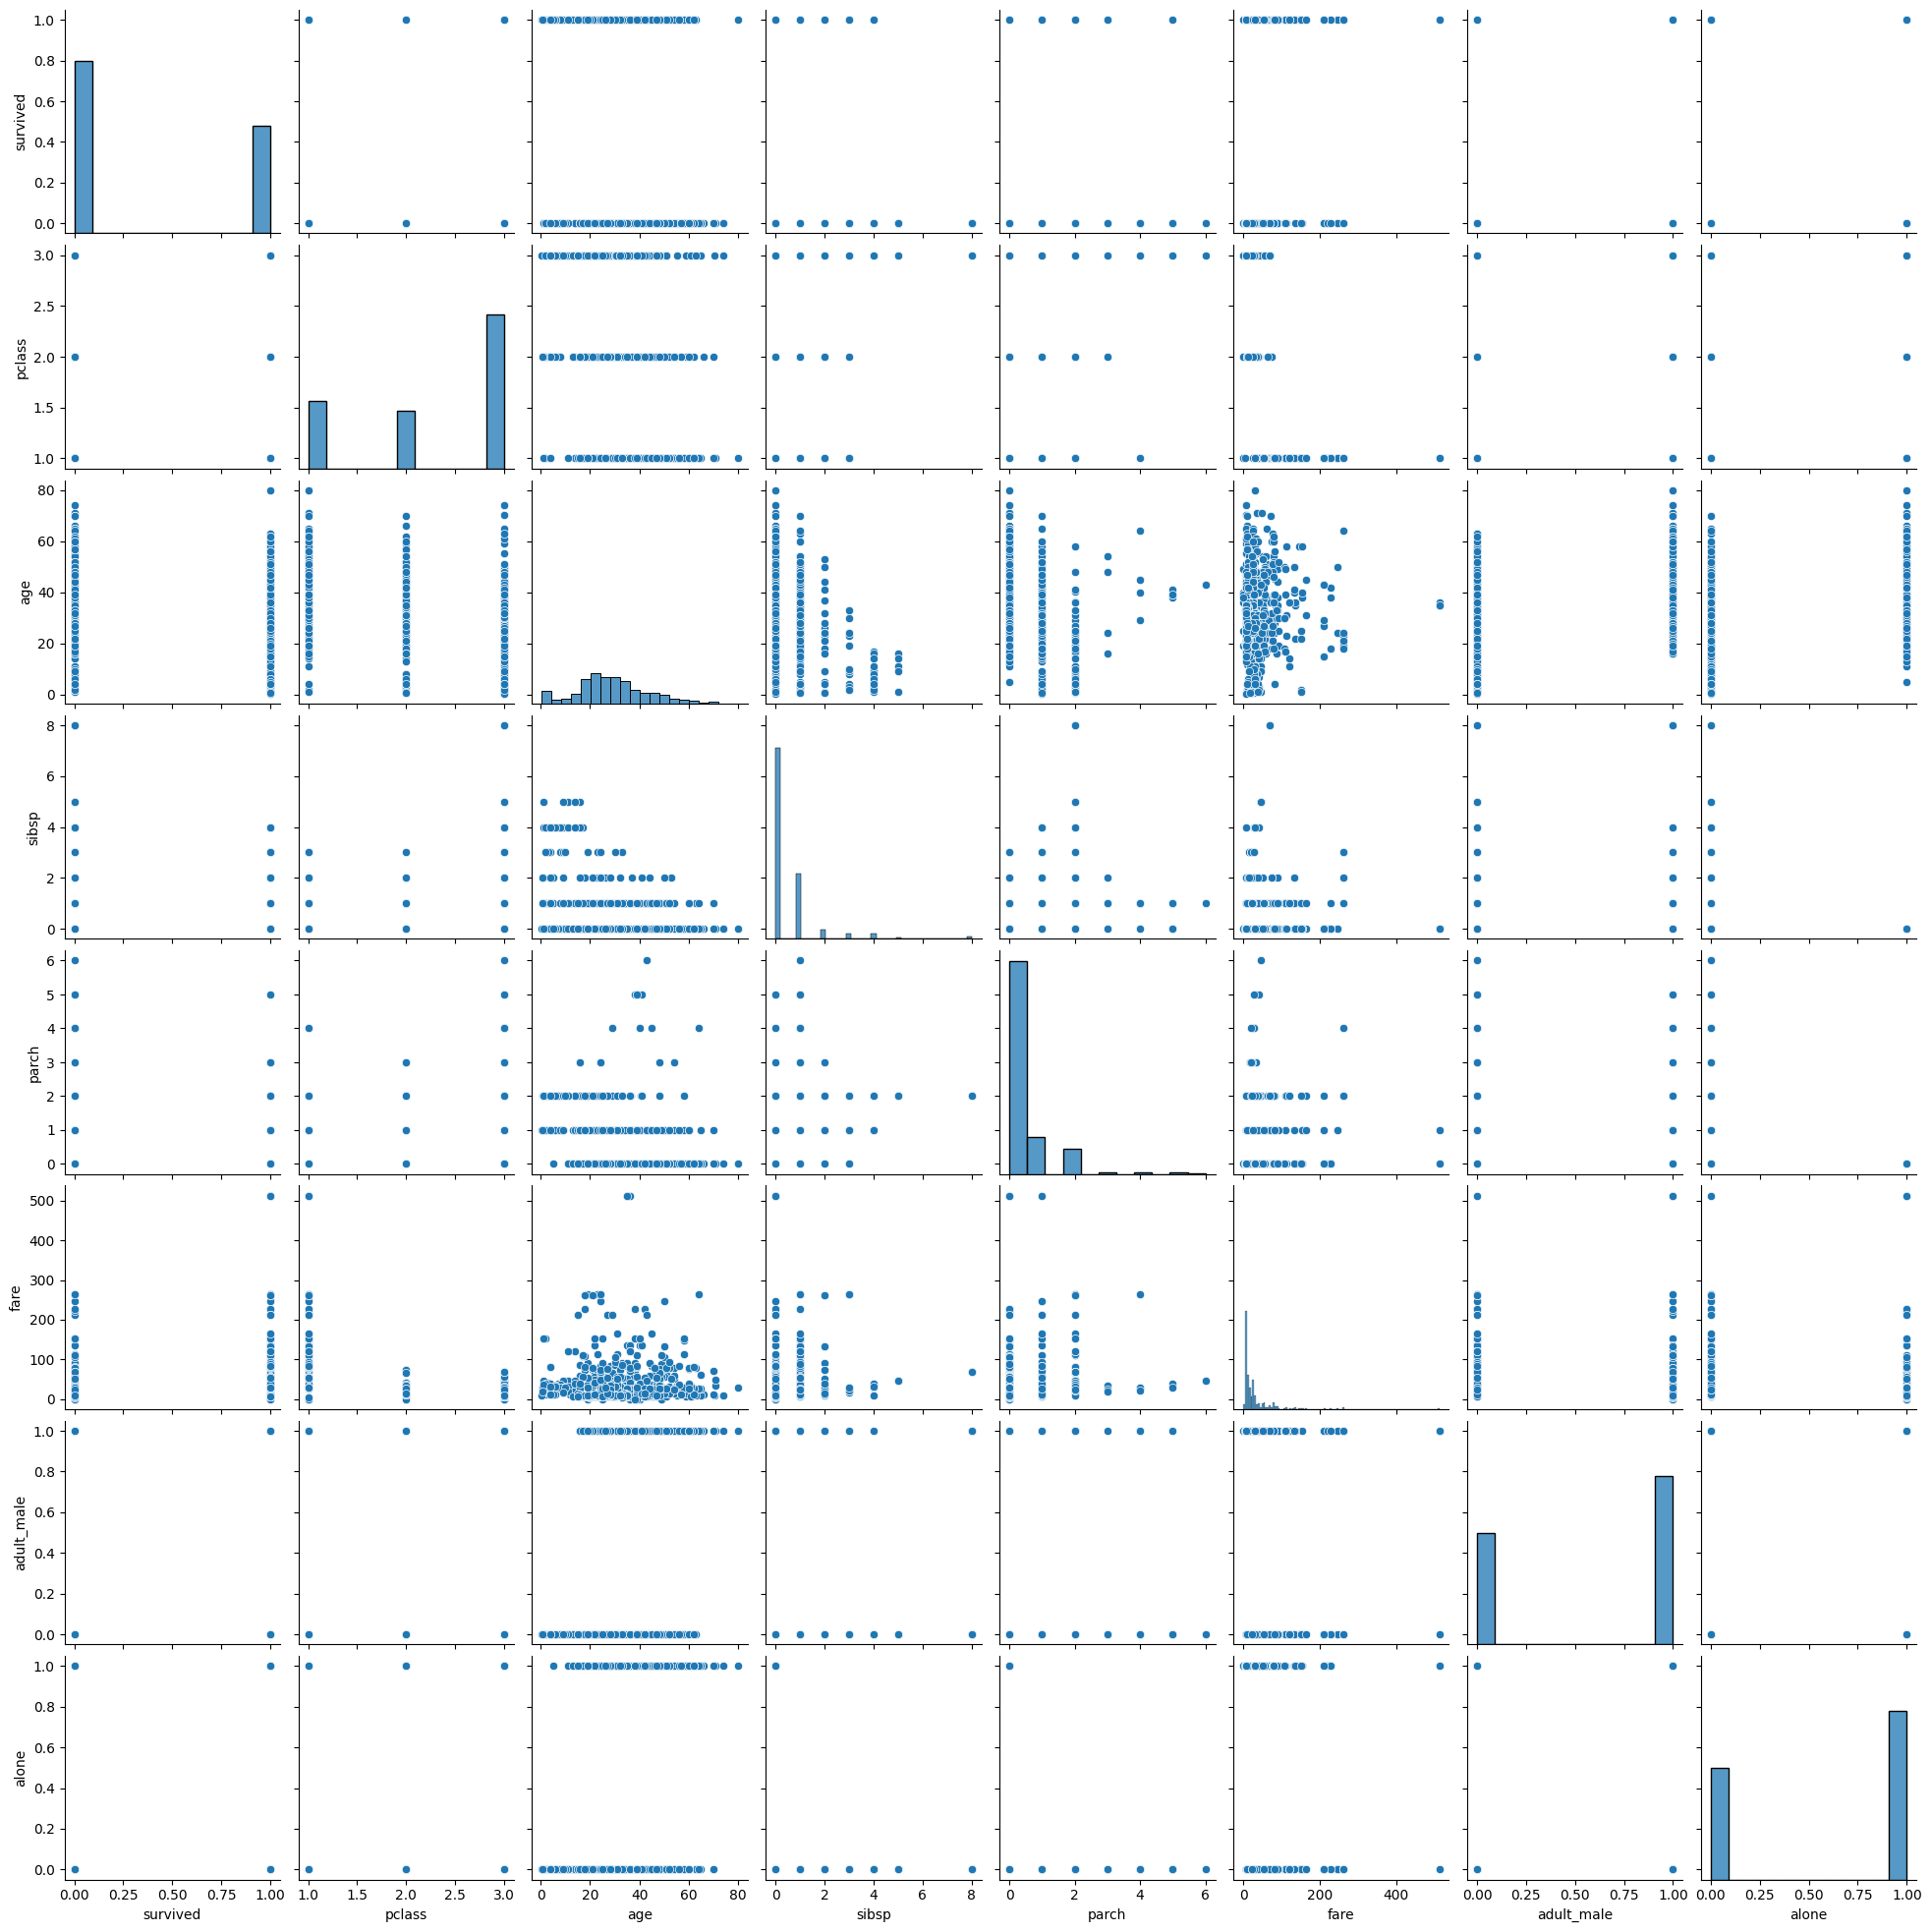

In [13]:
sns.pairplot(data=df)
plt.show()

# Data Cleaning

In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# Remove the deck column
df.drop("deck",axis=1,inplace=True)

In [16]:
#Fill the missing values
df["age"]=df["age"].fillna(df["age"].median())
df['embark_town']=df["embark_town"].fillna(df["embark_town"].mode()[0])

In [17]:
# Check the duplicate value
df.duplicated().sum()

116

In [18]:
# Drop  the duplicated values
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


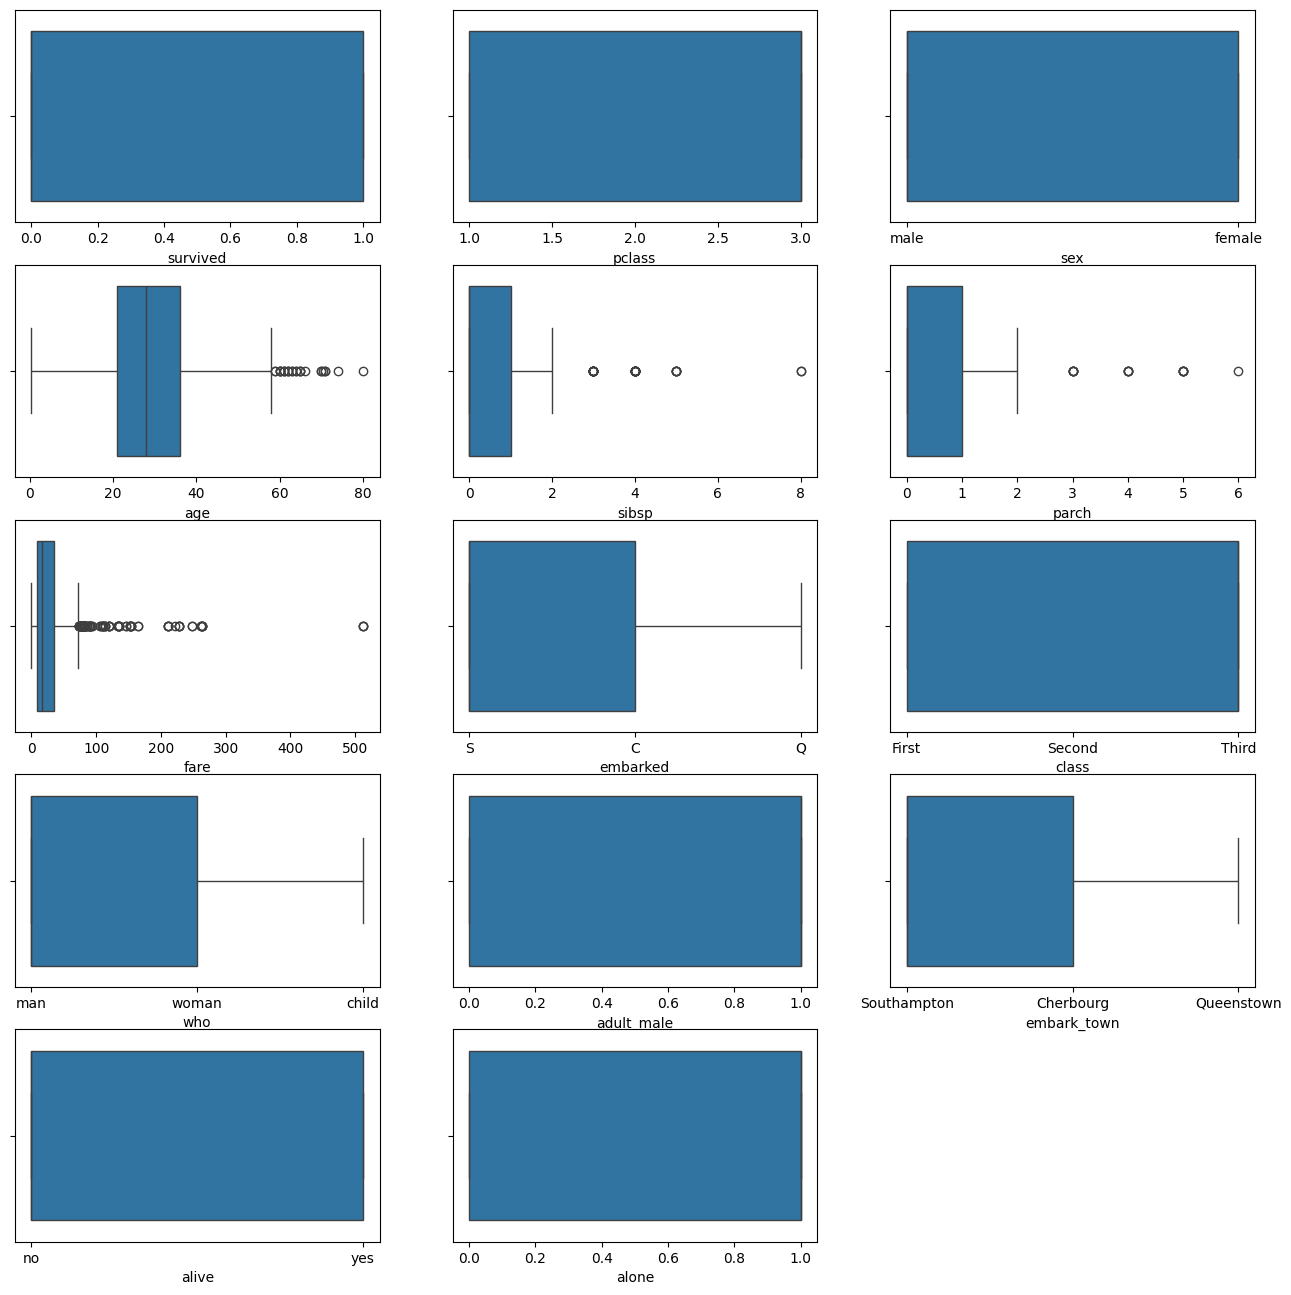

In [21]:
#Check the outliers
plt.figure(figsize=(16,16))
for i,j in enumerate(df):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=df,x=j)
plt.show()

In [22]:
d=["fare","age","parch","sibsp"]

In [23]:
# #Remove the all outlier
def outlier(col):
    q1,q3=np.percentile(col,[25,75])
    innerquartilerange=q3-q1
    loweroutlier=q1-1.5*innerquartilerange
    upperoutlier=q3+1.5*innerquartilerange
    return loweroutlier,upperoutlier
    
for i in df[d]:
    loweroutlier,upperoutier=outlier(df[i])
    df[i]=np.where(df[i]<loweroutlier,loweroutlier,df[i]) #If less than lower outlier then fill it loweroutlier or as it
    df[i]=np.where(df[i]>upperoutier,upperoutier,df[i])

In [24]:
#Remove the unnecessary column
df.drop(["who","pclass","embarked","survived","alive","sibsp"],axis=1,inplace=True)

In [25]:
# Apply the  label encoding
lb=LabelEncoder()
df["sex"]=lb.fit_transform(df["sex"])
df["class"]=lb.fit_transform(df["class"])
df["embark_town"]=lb.fit_transform(df["embark_town"])



In [26]:
#Scaler
scaler= StandardScaler()
df["age"]=scaler.fit_transform(df[["age"]])
df["fare"]=scaler.fit_transform(df[["fare"]])


In [27]:
df.sample()

,sex,age,parch,fare,class,adult_male,embark_town,alone
493,1,2.206826,0.0,1.002307,0,True,0,True


# Apply the model

In [28]:
#Train test and split the data
X=df.drop("fare",axis=1)
Y=df['fare']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [29]:
#Build the  linear regression model
linear=LinearRegression()

linear.fit(X_train,Y_train)


LinearRegression()

In [30]:
#Build the  ridge regression model
ridgee=Ridge(alpha=5)
ridgee.fit(X_train,Y_train)

Ridge(alpha=5)

In [31]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [61]:

#train the model
li_pred=linear.predict(X_test)
rg_pred=ridgee.predict(X_test)
lasso_pred=lasso.predict(X_test)

print("MSE  for linear regression= ",mean_squared_error(Y_test,li_pred))
print("MSE ridfge regression= ",mean_squared_error(Y_test,rg_pred))
print("MSE lasso regression= ",mean_squared_error(Y_test,lasso_pred),"\n")

print("R2  score for linear = ",r2_score(Y_test,li_pred))
print("R2 score for ridge = ",r2_score(Y_test,rg_pred))
print("R2 score for lasso = ",r2_score(Y_test,lasso_pred))

MSE  for linear regression=  0.28969310142272464
MSE ridfge regression=  0.2889756243175995
MSE lasso regression=  0.29128022582352914 

R2  score for linear =  0.7136031529890949
R2 score for ridge =  0.7143124663269038
R2 score for lasso =  0.7120340875816961


# Predication

In [54]:
df.head(3)

,sex,age,parch,fare,class,adult_male,embark_town,alone
0,1,-0.557683,0.0,-0.846218,2,True,2,False
1,0,0.654157,0.0,1.955092,0,False,0,False
2,0,-0.254723,0.0,-0.816688,2,False,2,True


In [58]:
ridgee.predict([[0,0.654157,0.0,0,False,0,False]])

array([1.40984266])

In [59]:
linear.predict([[0,0.654157,0.0,0,False,0,False]])

array([1.43006256])

In [60]:
lasso.predict([[0,0.654157,0.0,0,False,0,False]])

array([1.37438023])